<h1>Music DataSet Analysis</h1>

Music dataset analysis involves exploring trends, audio features, and listener preferences using data science techniques. By examining attributes like tempo, energy, sentiment, and genre popularity, we can uncover patterns in music evolution and listener behavior. This analysis helps in building recommendation systems, predicting hit songs, and understanding the dynamics of the music industry.

<h1>step1)Importing libraries & Data PreProcessing</h1>

In [1]:
!pip install chardet
!pip install dash
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chardet
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dash
from dash import dcc
from dash import html 
from dash.dependencies import Input, Output

In [7]:
#Encoding the csv file 
encoding_list = ['latin1', 'ISO-8859-1', 'cp1252']
for encoding in encoding_list:
    try:
        df = pd.read_csv("/home/prasanna/Desktop/Most _Streamed_Spotify_Songs 2024.csv",encoding=encoding)
        print(f"Successfully read the file with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read the file with encoding: {encoding}")

df

Successfully read the file with encoding: latin1


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [9]:
df['Spotify Playlist Count'].isnull().sum()

70

<h3>Data Processing</h3>

In [10]:
#lets check how many missing values are present in each column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Exp

In [12]:
df.shape

(4600, 29)

In [13]:
df.drop(columns=['Soundcloud Streams','TIDAL Popularity'], axis=1,inplace=True)

In [14]:
#picking the spotify playlist count
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].fillna(0)
df['Spotify Playlist Count'].isnull().sum()

0

In [15]:
#Removing commas
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].apply(lambda x: str(x).replace(',', ''))
df['Spotify Playlist Count']

0        30716
1        28113
2        54331
3       269802
4         7223
         ...  
4595     65770
4596      4602
4597     72066
4598     14037
4599     32138
Name: Spotify Playlist Count, Length: 4600, dtype: object

In [16]:
#Converting to int
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].astype('int16')
df['Spotify Playlist Count'].dtype

dtype('int16')

In [17]:
#Identifing the duplicate records and keep the first occurance
df_duplicates = pd.DataFrame(df.duplicated()).rename(columns={0: 'duplicate'})
df_duplicates[df_duplicates['duplicate'] == True]

,duplicate
2450,True
3450,True


In [18]:
df.iloc[2449: 2451]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
2449,Tennessee Orange,Tennessee Orange,Megan Moroney,9/2/2022,TCAGJ2289254,"2,424",28.9,"227,893,586",28139,"12,480,714",...,33.0,"129,172",34,5.0,"1,370",49.0,"56,972,562","26,968","708,143",0
2450,Tennessee Orange,Tennessee Orange,Megan Moroney,9/2/2022,TCAGJ2289254,"2,424",28.9,"227,893,586",28139,"12,480,714",...,33.0,"129,172",34,5.0,"1,370",49.0,"56,972,562","26,968","708,143",0


In [19]:
df.duplicated().sum()

2

<h3>Identifying Outliers</h3>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4600 non-null   int16  
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

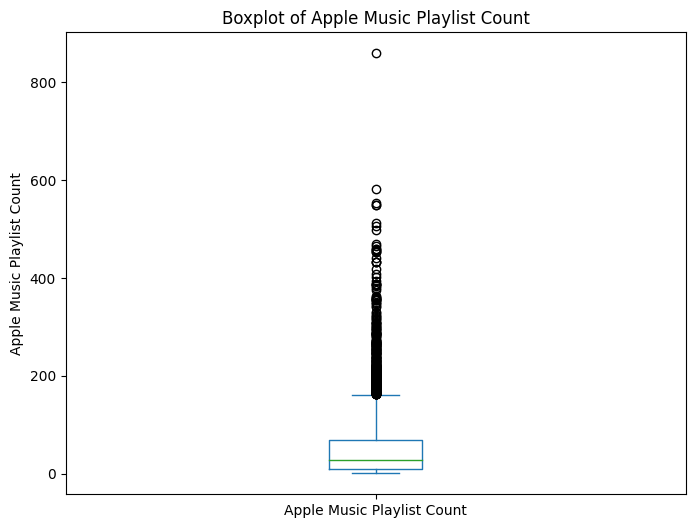

In [21]:
plt.figure(figsize=(8, 6))
df['Apple Music Playlist Count'].plot(kind='box')
plt.title('Boxplot of Apple Music Playlist Count')
plt.ylabel('Apple Music Playlist Count')
plt.show()

<h3>correcting data format</h3>

In [22]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Release Month'] = df['Release Date'].dt.month
df['Release Date']

0      2024-04-26
1      2024-05-04
2      2024-03-19
3      2023-01-12
4      2024-05-31
          ...    
4595   2017-09-05
4596   2018-07-27
4597   2020-02-28
4598   2016-11-08
4599   2017-04-11
Name: Release Date, Length: 4600, dtype: datetime64[ns]

In [23]:
df['Release Month']

0        4
1        5
2        3
3        1
4        5
        ..
4595     9
4596     7
4597     2
4598    11
4599     4
Name: Release Month, Length: 4600, dtype: int32

In [24]:
df['Release Year'] = df['Release Date'].dt.year
df['Release Year']

0       2024
1       2024
2       2024
3       2023
4       2024
        ... 
4595    2017
4596    2018
4597    2020
4598    2016
4599    2017
Name: Release Year, Length: 4600, dtype: int32

In [25]:
df.describe()

,Release Date,Track Score,Spotify Playlist Count,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,Explicit Track,Release Month,Release Year
count,4600,4600.000000,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,4600.000000,4600.000000,4600.000000
mean,2021-01-27 07:48:18.782608896,41.844043,2824.197174,63.501581,54.60312,32.310954,25.348942,0.358913,6.046304,2020.616739
min,1987-07-21 00:00:00,19.400000,-32767.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1987.000000
25%,2019-07-16 18:00:00,23.300000,-6049.750000,61.000000,10.00000,5.000000,8.000000,0.000000,3.000000,2019.000000
50%,2022-06-01 00:00:00,29.900000,2854.000000,67.000000,28.00000,15.000000,17.000000,0.000000,6.000000,2022.000000
75%,2023-08-11 00:00:00,44.425000,14601.500000,73.000000,70.00000,37.000000,34.000000,1.000000,9.000000,2023.000000
max,2024-06-14 00:00:00,725.400000,32703.000000,96.000000,859.00000,632.000000,210.000000,1.000000,12.000000,2024.000000
std,NaN,38.543766,16419.474330,16.186438,71.61227,54.274538,25.989826,0.479734,3.419663,3.611707


**Calculating the Interquartile Range (IQR) for the Track Score**

In [26]:
per25=np.percentile(df['Track Score'],25)
per25

23.3

In [27]:
per75=np.percentile(df['Track Score'],75)
per75

44.425

In [28]:
iqr=per75-per25
iqr

21.124999999999996

<h1>step2)Plotting horizontal bar graph for Artist</h1>

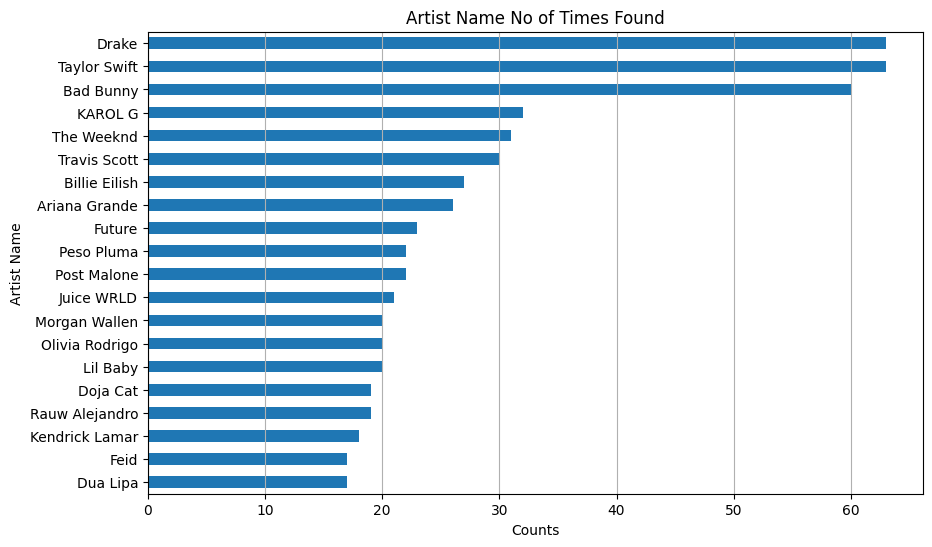

In [30]:
value_counts = df['Artist'].value_counts()
# Creating the horizontal bar plot
plt.figure(figsize=(10, 6))
value_counts.head(20).plot(kind='barh')
plt.xlabel('Counts')
plt.ylabel('Artist Name')
plt.title('Artist Name No of Times Found')
plt.gca().invert_yaxis() 
plt.grid(axis='x')
plt.show()

<h1>step3)Plotting Correlation map</h1>

In [31]:
numerical_cols = [col for col in df.columns if df[col].dtype not in ['object', 'category', 'datetime64[ns]']]
numerical_cols

['Track Score',
 'Spotify Playlist Count',
 'Spotify Popularity',
 'Apple Music Playlist Count',
 'Deezer Playlist Count',
 'Amazon Playlist Count',
 'Explicit Track',
 'Release Month',
 'Release Year']

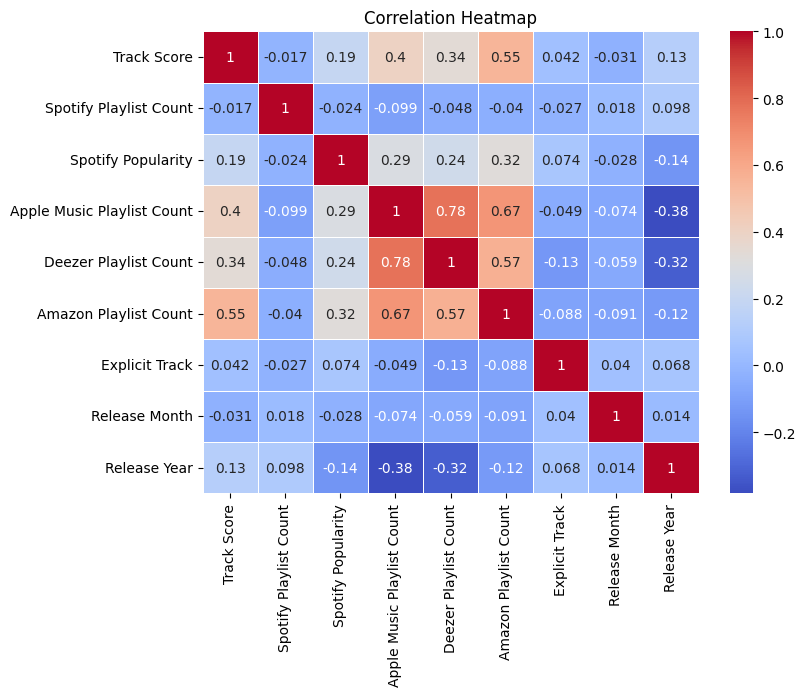

In [32]:
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<h1>step4)Scatter Plot</h1>

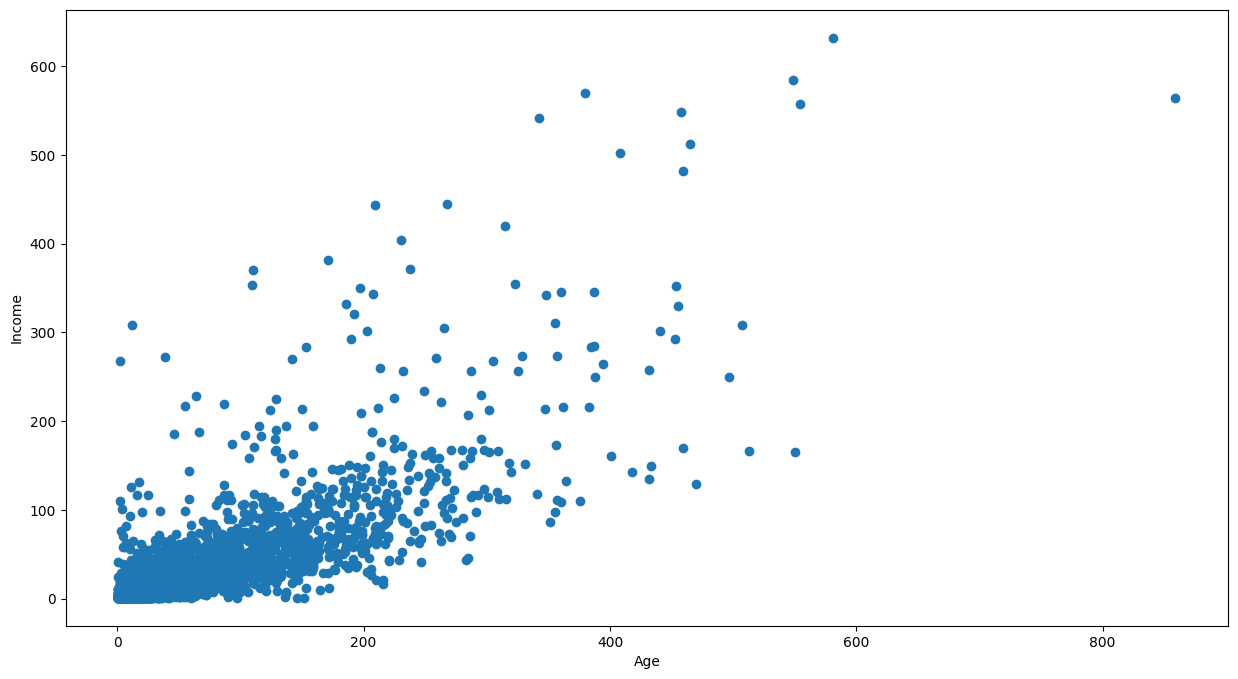

In [33]:
plt.figure(figsize=(15, 8))
plt.scatter(df['Apple Music Playlist Count'], df['Deezer Playlist Count'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

<h1>step5)Comparing Artists According to All time rank</h1>

In [34]:
# Convert 'All Time Rank' to numeric, forcing errors to NaN
df['All Time Rank'] = pd.to_numeric(df['All Time Rank'], errors='coerce')
# Drop rows with missing values in 'Artist' or 'All Time Rank' columns
df = df.dropna(subset=['Artist', 'All Time Rank'])
# Display the first few rows of the cleaned DataFrame
print(df.head())

                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC  All Time Rank  Track Score Spotify Streams  \
0   2024-04-26  QM24S2402528            1.0        725.4     390,470,936   
1   2024-05-04  USUG12400910            2.0        545.9     323,703,884   
2   2024-03-19  QZJ842400387            3.0        538.4     601,309,283   
3   2023-01-12  USSM12209777            4.0        444.9   2,031,280,633   
4   2024-05-31  USUG12403398            5.0        423.3     107,034,922   

   Spotify Playlist Count Spotify Playlist Reach  ...  SiriusXM Spin

In [35]:
# Group by 'Artist' and calculate the mean of 'All Time Rank'
artist_rank_mean = df.groupby('Artist')['All Time Rank'].mean().reset_index()
print(artist_rank_mean)

                               Artist  All Time Rank
0                            (G)I-DLE          616.0
1                           21 Savage          537.0
2                            24kGoldn          130.0
3                       3 Palavrinhas          118.0
4                               4batz          520.5
..                                ...            ...
553                            thï¿½ï          260.0
554                               ýý$           67.0
555                         ýýneheart          828.0
556                        ýýýýýýýýýý          345.0
557  ýýýýýýýýýýýýýýý(ýýýýýýýýýýýýýýý)          162.0

[558 rows x 2 columns]


In [36]:
# Sort artists by their average 'All Time Rank'
artist_rank_mean = artist_rank_mean.sort_values(by='All Time Rank')
print(artist_rank_mean)

                    Artist  All Time Rank
36                 Artemas            3.0
270         Kids With Buns           15.0
551  official sound studio           25.0
477            Teddy Swims           25.0
514                WZ Beat           26.0
..                     ...            ...
454                  Spice          993.0
163                FARIANA          994.0
387                  PAWSA          995.0
289                     LP          998.0
340     Marï¿½ï¿½lia Mendo          999.0

[558 rows x 2 columns]


In [37]:
# Find the top-ranked song for each artist
top_ranked_song = df.loc[df.groupby('Artist')['All Time Rank'].idxmin()].reset_index(drop=True)
print(top_ranked_song[['Artist', 'Track', 'All Time Rank']])

                               Artist  \
0                            (G)I-DLE   
1                           21 Savage   
2                            24kGoldn   
3                       3 Palavrinhas   
4                               4batz   
..                                ...   
553                            thï¿½ï   
554                               ýý$   
555                         ýýneheart   
556                        ýýýýýýýýýý   
557  ýýýýýýýýýýýýýýý(ýýýýýýýýýýýýýýý)   

                                        Track  All Time Rank  
0                                   Queencard          616.0  
1                                      redrum           87.0  
2                      Mood (feat. iann dior)          130.0  
3    Chegou a Hora de Ir para Cama (Playback)          118.0  
4                            act ii: date @ 8          414.0  
..                                        ...            ...  
553                   girls like me don't cry          260.0  
554

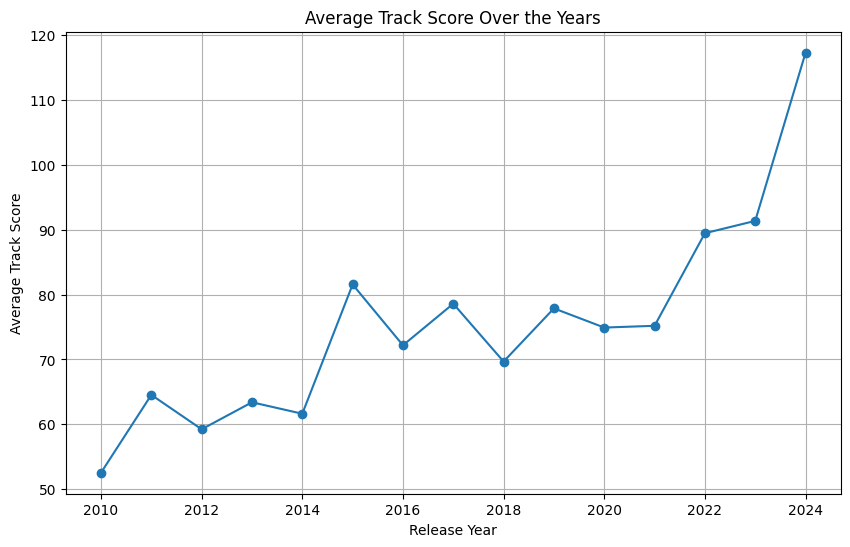

In [38]:
avg_track_score_by_year = df.groupby('Release Year')['Track Score'].mean()
plt.figure(figsize=(10, 6))
avg_track_score_by_year.plot(kind='line', marker='o')
plt.title('Average Track Score Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Track Score')
plt.grid(True)
plt.show()

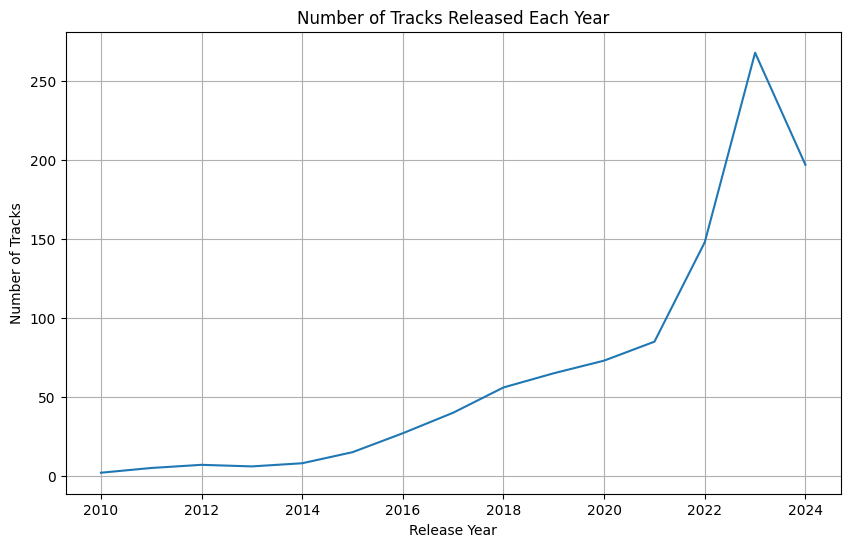

In [39]:
#Number of musics released every year
tracks_per_year = df['Release Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
tracks_per_year.plot(kind='line')
plt.title('Number of Tracks Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()

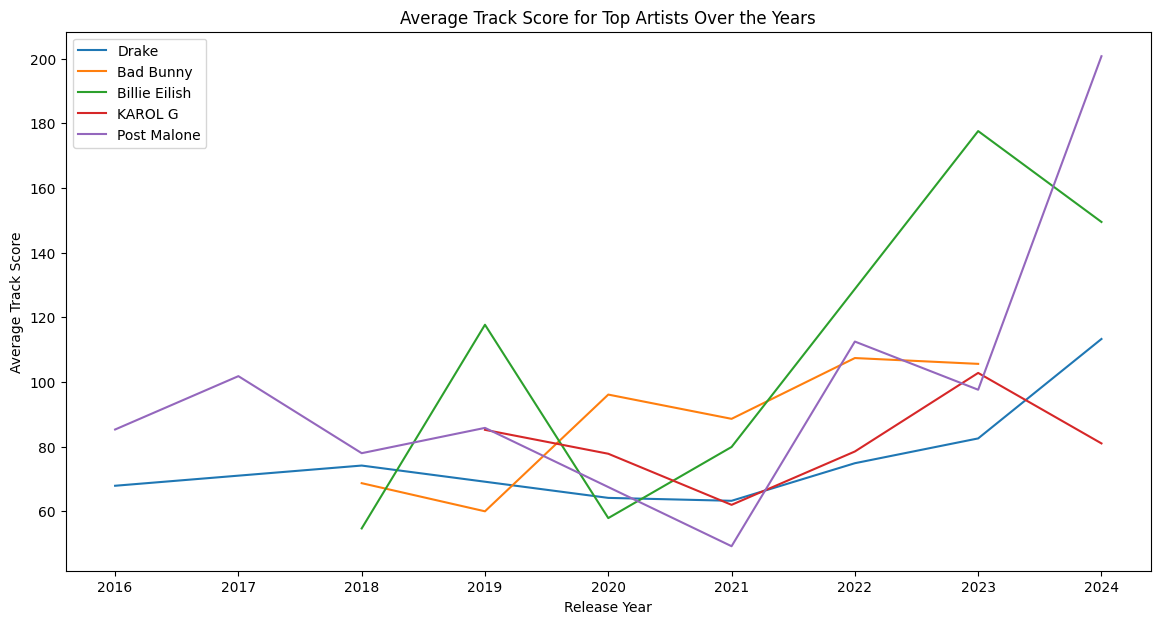

In [40]:
# Identify top 5 artists (assuming 'Artist' column exists)
top_artists = df['Artist'].value_counts().head(5).index.tolist()

# Plot the average Track Score for top artists over the years
plt.figure(figsize=(14, 7))

for artist in top_artists:
    artist_data = df[df['Artist'] == artist]
    avg_track_score_by_year = artist_data.groupby('Release Year')['Track Score'].mean()
    avg_track_score_by_year.plot(kind='line', label=artist)

plt.legend()
plt.title('Average Track Score for Top Artists Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Track Score')
plt.show()

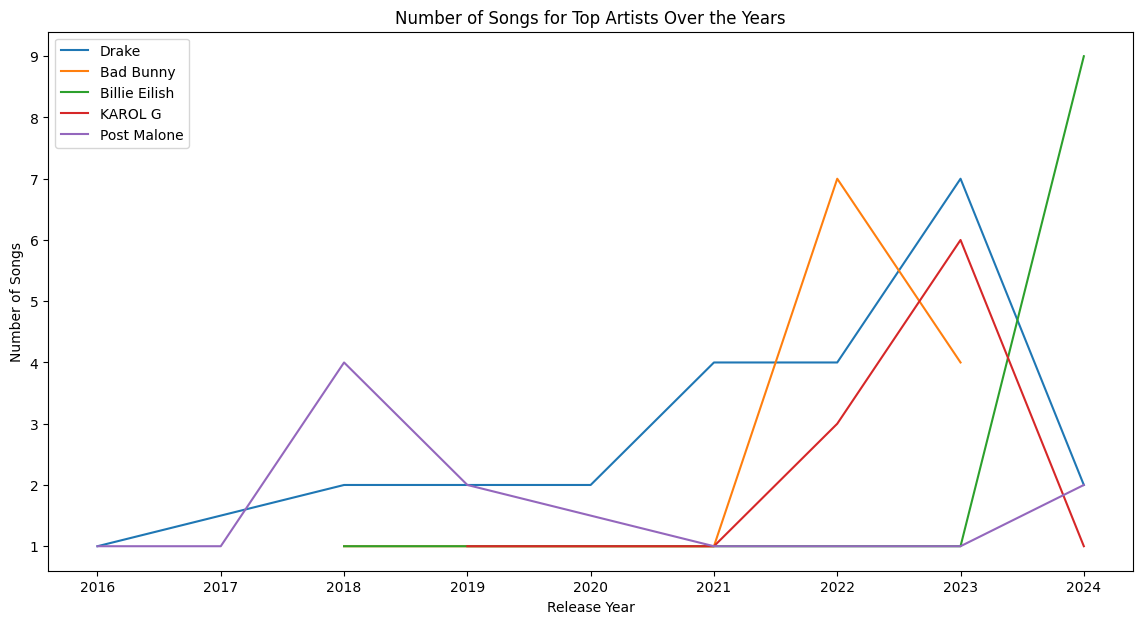

In [42]:
# Filter data for top artists
df_top_artists = df[df['Artist'].isin(top_artists)]

# Plot the trend of number of songs for top artists over the years
plt.figure(figsize=(14, 7))
for artist in top_artists:
    artist_data = df_top_artists[df_top_artists['Artist'] == artist]
    songs_per_year = artist_data['Release Year'].value_counts().sort_index()
    songs_per_year.plot(kind='line', label=artist)

plt.legend()
plt.title('Number of Songs for Top Artists Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.show()

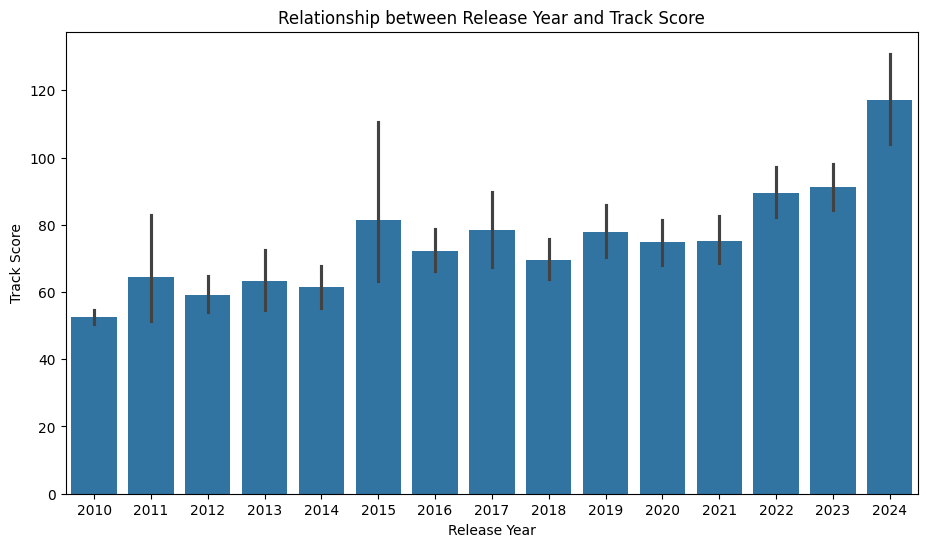

In [43]:
# Plot the relationship between Release Year and Track Score
df_cleaned = df.dropna(subset=['Release Year', 'Track Score'])
plt.figure(figsize=(11, 6))
sns.barplot(x='Release Year', y='Track Score', data=df_cleaned)
plt.title('Relationship between Release Year and Track Score')
plt.xlabel('Release Year')
plt.ylabel('Track Score')
plt.show()

<h1>step6)kde plot</h1>

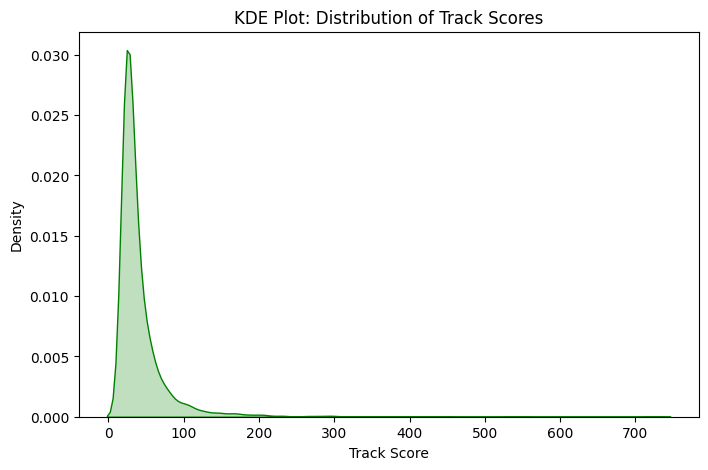

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/home/prasanna/Desktop/Most _Streamed_Spotify_Songs 2024.csv", encoding="latin1")

df["Track Score"] = pd.to_numeric(df["Track Score"], errors="coerce")
df.dropna(subset=["Track Score"], inplace=True)

plt.figure(figsize=(8,5))
sns.kdeplot(df["Track Score"], fill=True, color="green")
plt.title("KDE Plot: Distribution of Track Scores")
plt.xlabel("Track Score")
plt.ylabel("Density")
plt.show()


<h1>step7)Pie Chart-Top 5 Artists by Total Streams</h1>

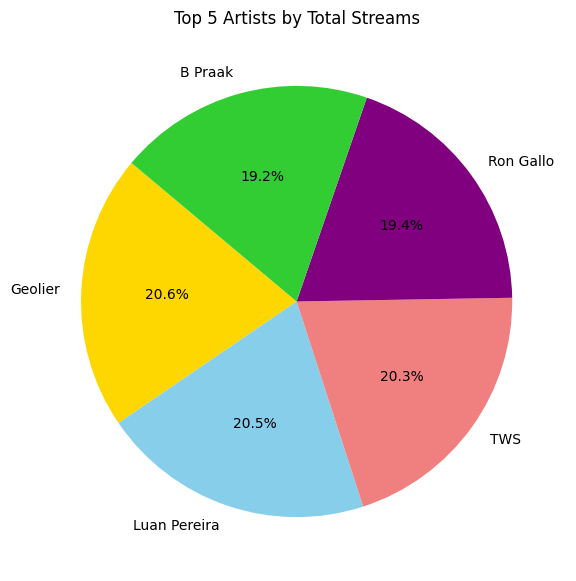

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/home/prasanna/Desktop/Most _Streamed_Spotify_Songs 2024.csv", encoding="latin1")

# Convert streaming columns to numeric
streaming_columns = ["Spotify Streams", "Pandora Streams", "Soundcloud Streams"]
df[streaming_columns] = df[streaming_columns].apply(pd.to_numeric, errors="coerce")

# Calculate total streams per artist
df["Total Streams"] = df[streaming_columns].sum(axis=1)

# Get Top 5 Artists by Total Streams
top_artists = df.groupby("Artist")["Total Streams"].sum().nlargest(5)

# Pie Chart
plt.figure(figsize=(7,7))
colors = ["gold", "skyblue", "lightcoral", "purple", "limegreen"]
plt.pie(top_artists, labels=top_artists.index, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Top 5 Artists by Total Streams")
plt.show()


<h1>step8)Violin Plot - Comparing Streams Across Platforms</h1>

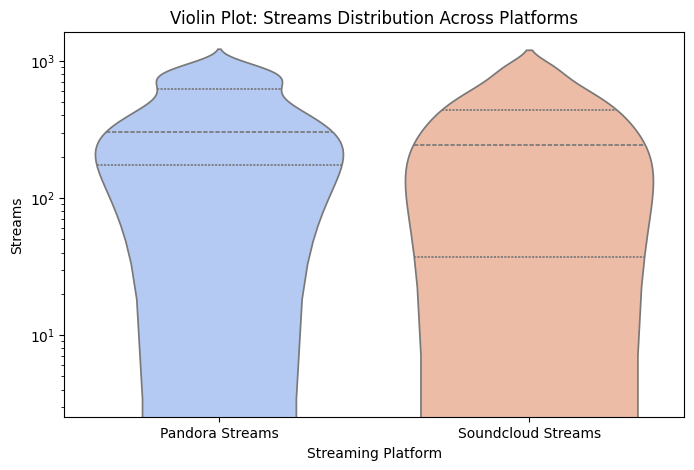

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/home/prasanna/Desktop/Most _Streamed_Spotify_Songs 2024.csv", encoding="latin1")

# Convert columns to numeric
streaming_columns = ["Spotify Streams", "Pandora Streams", "Soundcloud Streams"]
df[streaming_columns] = df[streaming_columns].apply(pd.to_numeric, errors="coerce")
df_melted = df.melt(value_vars=streaming_columns, var_name="Streaming Platform", value_name="Streams")


df_melted.dropna(inplace=True)
plt.figure(figsize=(8,5))
sns.violinplot(x="Streaming Platform", y="Streams", hue="Streaming Platform", data=df_melted, palette="coolwarm", inner="quartile", legend=False)

plt.title("Violin Plot: Streams Distribution Across Platforms")
plt.xlabel("Streaming Platform")
plt.ylabel("Streams")
plt.yscale("log")  # Log scale to handle large numbers
plt.show()
